# A very quick introduction to Automatic Differention and Gradient Descent

## Example: using Gradient Descent to solve a Linear Regression Problem

## Part of CE811, University of Essex, 2020

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk


## Build a scatter diagram

- First build some datapoints for a simple linear regression example...

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# dataset for a simple regression problem (1 input 1 output):
import tensorflow.python.ops.resource_variable_ops

dataset_size: int =10
noise_level: int = 1
np.random.seed(1) # Seed the random number generator so the whole class have consistent results
x_train: np.float32 =(np.random.rand(dataset_size,1)*5+2).astype(np.float32)
y_train: np.float32 = (3*x_train+1+np.random.normal(scale=noise_level, size=(dataset_size,1))).astype(np.float32)

In [2]:
print("x_train",x_train.shape, x_train)
print("y_train",y_train.shape, y_train)

x_train (10, 1) [[4.08511  ]
 [5.6016226]
 [2.000572 ]
 [3.511663 ]
 [2.7337794]
 [2.461693 ]
 [2.931301 ]
 [3.7278037]
 [3.9838374]
 [4.6940837]]
y_train (10, 1) [[15.000143 ]
 [17.04366  ]
 [ 7.3207545]
 [11.285618 ]
 [10.663445 ]
 [ 6.324939 ]
 [ 9.471486 ]
 [11.799356 ]
 [14.085281 ]
 [13.982359 ]]


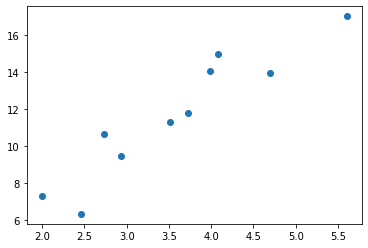

In [3]:
# show training set
plt.scatter(x_train, y_train)

## Build a linear regression model
- We will build a linear regression model $y=wx+b$ to try to fit the data.  
- We don't know what $w$ and $b$ are yet though.

In [4]:
import tensorflow as tf

w = tf.Variable(0.0, tf.float32)
b = tf.Variable(0.0, tf.float32)

def model(x):
    """
    What the model thinks the Y coordinate should be after being given x

    result is (x * w) + b

    *   w is gradient (to be trained)
    *   b is y-intercept (also to be trained)
    :param x: the input
    :return: (x * w) + b
    """
    return x*w+b

print(model(x_train))
# Just doing this prints it in tensorflow.tensor format (ugly, lots of extra data)

print(model(x_train).numpy())
# doing it like this prints it as a numpy object (less ugly)

tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Let's show how our model depends upon $w$:

In [5]:
w.assign(0.1)
print(model(x_train))

print(model(x_train).numpy())

tf.Tensor(
[[0.408511  ]
 [0.56016225]
 [0.2000572 ]
 [0.3511663 ]
 [0.27337795]
 [0.24616931]
 [0.29313013]
 [0.37278038]
 [0.39838374]
 [0.46940836]], shape=(10, 1), dtype=float32)
[[0.408511  ]
 [0.56016225]
 [0.2000572 ]
 [0.3511663 ]
 [0.27337795]
 [0.24616931]
 [0.29313013]
 [0.37278038]
 [0.39838374]
 [0.46940836]]


- In the cell below, try to print what the model outputs given input x=0.65.
    - **Try This** (Check: we should get 0.065)
    
- Remember in Jupyter Notebooks you can use "menu:cell:run cells" to run the currently highlighted cells.
        - the same can be achieved with ctrl+Enter
    - Also in Jupyter, in some notebooks you might need to "Menu:Cell:run all" to refresh all variables in the correct order
        - or even use "Kernel: Restart and run all"

In [6]:
# done putting some code here

print(model(0.65).numpy())


0.065


- **Try This**: Change b to 0.2 and evaluate the model given input x=0.65

In [7]:
# done putting some code here

b = tf.Variable(0.2, tf.float32)

print(model(0.65).numpy())

0.265


### Define a "loss function" 
- To apply gradient descent, we need to define a loss function.
- This loss function calculates how well the model is doing
- We will manually encode the mean-squared error

aiming to minimize 'residual error' (sum of square error)

In [8]:
def loss_function(x ,y):
    """
    :param x: input to give the model
    :param y: expected output from the model.
    :return: mean squared error of model(x)-y
    """
    return tf.reduce_mean(tf.square(model(x)-y))

print(loss_function(x_train, y_train))

tf.Tensor(133.95712, shape=(), dtype=float32)


- **Try this:**
    - In the cell below, evaluate the loss function when x=1 and the output is supposedly 4.
    - Compare this to the actual model output when x=1

In [9]:
# done putting some code here

print("loss when x=1 and output is supposed to be 4")

print(loss_function(1, 4))
print("")
print("actual output when x=1")
print(model(1))

print("")
print("difference:")
print(loss_function(1,4) - model(1))



loss when x=1 and output is supposed to be 4
tf.Tensor(13.690001, shape=(), dtype=float32)

actual output when x=1
tf.Tensor(0.3, shape=(), dtype=float32)

difference:
tf.Tensor(13.39, shape=(), dtype=float32)


### Use Automatic Differentiation

- Automatic differentiation is one of the amazing things about tensorflow, which allows Keras to build and train neural networks very easily.
- It uses "back-propagation" to compute the necessary gradients.
- Here we'll use it to compute the gradient of the loss function with respect to $w$ and $b$

Keras sits on top of TensorFlow.
TensorFlow provides automatic differentiation.

How does the loss change as we change the variables w and b?

In [10]:
with tf.GradientTape() as tape:
    # Tells TensorFlow that we want to do some automatic differentiation.

    # We define a gradient tape.
    # The stuff in this block is the stuff we might want to differentiate
    # In this instance, we're differentiating the variable L.

    # Run the forward pass of the layer.
    # The operations that the layer applies
    # to its inputs are going to be recorded
    # on the GradientTape.
    L=loss_function(x_train, y_train)


print("L",L.numpy())
grads = tape.gradient(L, [w,b])
# Asking for the gradient of L, in respect to w and b.

print("w,b",w.numpy(),b.numpy())
print("dL/dw",grads[0].numpy()) # first element of grads list (w) will be printed
print("dL/db",grads[1].numpy()) # second element of grads list (b) will be printed

L 133.95712
w,b 0.1 0.2
dL/dw -85.65322
dL/db -22.28078


Running the above gives us:

```
L 133.95712
w,b 0.1 0.2
dL/dw -85.65322
dL/db -22.28078
```
Tells us that

* Increasing W decreases L, because gradient is negative.
* Increasing B also decreases L, because gradient is negative

We want to minimize L, so increasing both (from here) is good.

### Apply an iteration of "gradient descent"
If we aim to improve $L$ a tiny bit then we can use the following two updates:
- $w \leftarrow w-\eta \frac{\partial L}{\partial w}$
- $b \leftarrow b-\eta \frac{\partial L}{\partial b}$

where $\eta>0$ is any small number we choose.

This is what is meant by "gradient descent".


-
We're trying to tweak W and B to make L as small as possible.


We tweak w and b by the first and second entries in the grads list respectively.

(Reducing them by eta*grads[0], which, as the grads stuff is negative, increases them)

In [11]:
with tf.GradientTape() as tape:
    L=loss_function(x_train, y_train)
grads = tape.gradient(L, [w,b])
eta=0.001
w.assign(w-eta*grads[0])
b.assign(b-eta*grads[1])
print("w,b",w.numpy(),b.numpy())
L=loss_function(x_train, y_train)
print("L",L.numpy())

w,b 0.18565322 0.22228079
L 126.23983


w and b have been moved a little bit, L has decreased a little bit.

Change it by a little bit enough times -> we get it changed by a lot.

### Iteratively apply gradient descent

- Run the code block below several times and see what $w$ and $b$ converge to.
    - In Jupyter, Click ctrl+enter to run a block.
- **Extra Challenge:** Try to wrap the code block below into a python "for loop" to run 10000 times.

In [12]:
run_this_10000_times: bool = True

print_details_10000: bool = False

if run_this_10000_times:

    print("RUNNING IT 10000 TIMES!")

    with tf.GradientTape() as tape:
        L=loss_function(x_train, y_train)

    eta = 0.001
    print("Original w,b",w.numpy(),b.numpy())
    print("Original L",L.numpy())

    for i in range(10000):
        with tf.GradientTape() as tape:
            L=loss_function(x_train, y_train)

        grads = tape.gradient(L, [w,b])
        w.assign(w-eta*grads[0])
        b.assign(b-eta*grads[1])
        if print_details_10000:
            print("w,b",w.numpy(),b.numpy())
            new_L=tf.reduce_mean(tf.square(model(x_train)-y_train))
            print("new_L",new_L.numpy(),". Old L",L.numpy())
            L = new_L
        else:
            L=tf.reduce_mean(tf.square(model(x_train)-y_train))

    print("newest w,b",w.numpy(),b.numpy())
    print("newest L",L.numpy())

else:
    print("RUNNING IT ONCE!")

    with tf.GradientTape() as tape:
        L=loss_function(x_train, y_train)
    grads = tape.gradient(L, [w,b])

    eta=0.001
    w.assign(w-eta*grads[0])
    b.assign(b-eta*grads[1])
    print("w,b",w.numpy(),b.numpy())
    new_L=tf.reduce_mean(tf.square(model(x_train)-y_train))
    print("new_L",new_L.numpy(),". Old L",L.numpy())





RUNNING IT 10000 TIMES!
Original w,b 0.18565322 0.22228079
Original L 126.23983
newest w,b 2.9506273 1.1502846
newest L 1.286923


###  Use a built-in optimizer

- Instead of hand coding the updates for $w$ and $b$, we can use a built-in optimiser.
- For ordinary gradient descent we use "SGD" optimizer.


In [13]:
import tensorflow.keras as keras
w_history=[] # keep a history for plotting purposes
b_history=[]
L_history=[]
w.assign(0) # We'll restart from scratch in this script
b.assign(0)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0>

In [14]:
eta=0.001
optimizer=keras.optimizers.SGD(eta)
for i in range(1000):
    with tf.GradientTape() as tape:
        L=loss_function(x_train, y_train)
        
    grads = tape.gradient(L, [w,b])
    optimizer.apply_gradients(zip(grads, [w,b])) # This line updates w and b with 1 step of gradient descent

    w_history.append(w.numpy()) # append to history for plotting purposes
    b_history.append(b.numpy())
    L_history.append(L.numpy())
print("w,b",w.numpy(),b.numpy())
new_L=tf.reduce_mean(tf.square(model(x_train)-y_train))
print("new_L",new_L.numpy(),". Old L",L.numpy())

w,b 3.0293849 0.84698844
new_L 1.2968557 . Old L 1.2968585


### Compare to optimal values for linear regression

In [15]:
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train.reshape(-1),y_train.reshape(-1))
print("slope",slope)
print("intercept",intercept)


slope 2.9348235590433442
intercept 1.2111488477281167


The above code just finds the

Plot the history graphs to see how well the variables converged.

Text(0.5, 1.0, 'b history')

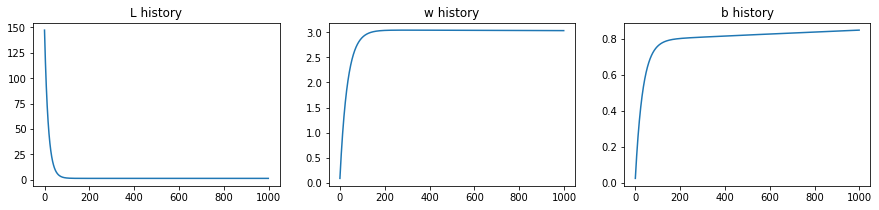

In [16]:
fig=plt.figure(figsize=[15, 3])
ax1=fig.add_subplot(1,3, 1)
ax1.plot(L_history)
ax1.set_title("L history")              
ax2=fig.add_subplot(1,3, 2)
ax2.plot(w_history)
ax2.set_title("w history")              
ax3=fig.add_subplot(1,3, 3)
ax3.plot(b_history)
ax3.set_title("b history")              

L goes down pretty darn quickly, W and B start going up quickly,
but, after about a hundred or so iterations, they start to stagnate.

**Exercise:**

1. Rerun the gradient descent iterations until the model's $w$ and $b$ parameters match the actual slope and intercept values calculated by stats.linregress
2. Increase / decrease the learning rate as you see fit.  

**Questions:**
1. What happens if eta is too large?  **TODO:** Write answer here
    * the numbers get way too large, starts fluctuating wildly, doesn't reach an appropriate result
2. What happens if eta is too small?  **TODO:** Write answer here
    * the numbers change really slowly, takes a long time for a good enough result to be reached.


In [17]:

# TODO: probably all junk, might need to yeet this cell.
# TODO: watch the video about this on moodle

from typing import Callable, Any, List, Tuple

def iterate_descent_gradient_stuff(
        new_eta: float,
        x_train2: np.ndarray,
        y_train2: np.ndarray,
        loss: Callable[[Any, Any], Any],
) -> Tuple[List[np.float32],List[np.float32],List[np.float32], Any]:
    """
    A function that can (in theory) be used for the interating descent gradient stuff
    :param new_eta: eta value to use
    :param x_train2: x_train value to use
    :param y_train2: y_train value to use
    :param loss: loss function
    :return: tuple containing the w history, b history, and L history
    """

    goal_slope, goal_intercept,\
    goal_r_value, goal_p_value,\
    goal_std_err = stats.linregress(x_train2.reshape(-1),y_train2.reshape(-1))


    w_history: List[np.float32] = [] # keep a history for plotting purposes
    b_history: List[np.float32]=[]
    L2_history: List[np.float32]=[]

    grads = []

    w.assign(0) # We'll restart from scratch in this script
    b.assign(0)

    optimizer2=keras.optimizers.SGD(new_eta)

    while not(np.equal(w, goal_intercept)) or not(np.equal(b, goal_slope)):

        with tf.GradientTape() as tape:
            L2=loss(x_train2, y_train2)
        grads = tape.gradient(L2, [w,b])
        optimizer2.apply_gradients(zip(grads, [w,b])) # This line updates w and b with 1 step of gradient descent

        w_history.append(w.numpy()) # append to history for plotting purposes
        b_history.append(b.numpy())
        L2_history.append(L2.numpy())

        if len(w_history) == 20000:
            break

    fig=plt.figure(figsize=[15, 3])
    ax1=fig.add_subplot(1,3, 1)
    ax1.plot(L_history)
    ax1.set_title("L history")
    ax2=fig.add_subplot(1,3, 2)
    ax2.plot(w_history)
    ax2.set_title("w history")
    ax3=fig.add_subplot(1,3, 3)
    ax3.plot(b_history)
    ax3.set_title("b history")

    fig.show()

    return w_history, b_history, L2_history, grads

<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
RESULTS WITH AN ETA OF 0.0001

ITERATIONS TAKEN: 10000
LOWEST L: 1.2968567609786987
OPTIMAL W: 3.029370069503784
OPTIMAL B: 0.8469632863998413

w,b 3.02937 0.8469633
dL/dw 0.013114631
dL/db -0.052714944


C:\Users\rl18730\AppData\Local\Temp/ipykernel_12436/1535847902.py:66: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


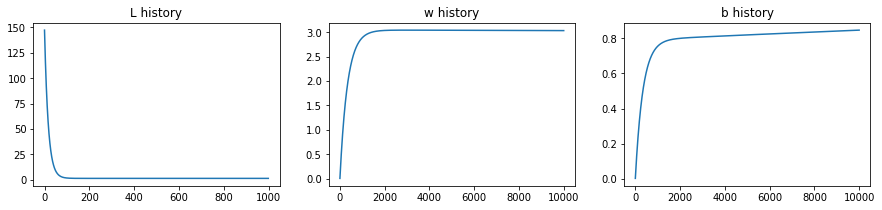

In [18]:

eta0001_iterations:\
    Tuple[List[np.float32], List[np.float32], List[np.float32], Any]\
    = iterate_descent_gradient_stuff(0.0001, x_train, y_train, loss_function)

print("RESULTS WITH AN ETA OF 0.0001")

print("\nITERATIONS TAKEN: {}".format(len(eta0001_iterations[0])))

lowest_l_0001: np.float32 = min(eta0001_iterations[2])

lowest_l_index_0001: int = eta0001_iterations[2].index(lowest_l_0001)

optimal_w_0001: np.float32 = eta0001_iterations[0][lowest_l_index_0001]

optimal_b_0001: np.float32 = eta0001_iterations[1][lowest_l_index_0001]

print("LOWEST L: {}".format(lowest_l_0001))
print("OPTIMAL W: {}".format(optimal_w_0001))
print("OPTIMAL B: {}".format(optimal_b_0001))


print("\nw,b",optimal_w_0001,optimal_b_0001)
print("dL/dw",eta0001_iterations[3][0].numpy()) # first element of grads list (w) will be printed
print("dL/db",eta0001_iterations[3][1].numpy())


<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
RESULTS WITH AN ETA OF 0.00001

ITERATIONS TAKEN: 10000
LOWEST L: 1.6980364322662354
OPTIMAL W: 2.8835837841033936
OPTIMAL B: 0.7552011013031006

w,b 2.8835838 0.7552011
dL/dw -4.6773067
dL/db -1.2784307


C:\Users\rl18730\AppData\Local\Temp/ipykernel_12436/1535847902.py:66: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


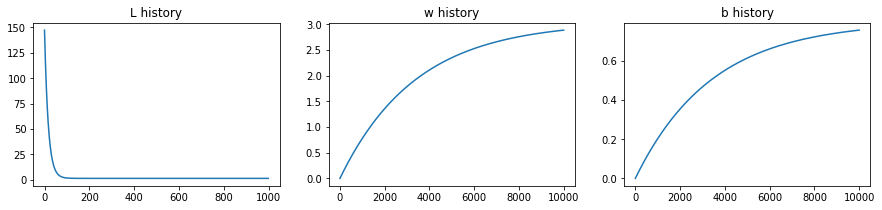

In [19]:
eta00001_iterations:\
    Tuple[List[np.float32], List[np.float32], List[np.float32], Any]\
    = iterate_descent_gradient_stuff(0.00001, x_train, y_train, loss_function)

print("RESULTS WITH AN ETA OF 0.00001")

print("\nITERATIONS TAKEN: {}".format(len(eta00001_iterations[0])))

lowest_l_00001: np.float32 = min(eta00001_iterations[2])

lowest_l_index_00001: int = eta00001_iterations[2].index(lowest_l_00001)

optimal_w_00001: np.float32 = eta00001_iterations[0][lowest_l_index_00001]

optimal_b_00001: np.float32 = eta00001_iterations[1][lowest_l_index_00001]

print("LOWEST L: {}".format(lowest_l_00001))
print("OPTIMAL W: {}".format(optimal_w_00001))
print("OPTIMAL B: {}".format(optimal_b_00001))


print("\nw,b",optimal_w_00001,optimal_b_00001)
print("dL/dw",eta00001_iterations[3][0].numpy()) # first element of grads list (w) will be printed
print("dL/db",eta00001_iterations[3][1].numpy())

<class 'numpy.float32'>
<class 'numpy.float32'>
<class 'numpy.float32'>
RESULTS WITH AN ETA OF 0.0001

ITERATIONS TAKEN: 10000
LOWEST L: 1.2873989343643188
OPTIMAL W: 2.960623264312744
OPTIMAL B: 1.111786961555481

w,b 2.9606233 1.111787
dL/dw 0.0036970377
dL/db -0.014353767


C:\Users\rl18730\AppData\Local\Temp/ipykernel_12436/1535847902.py:66: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


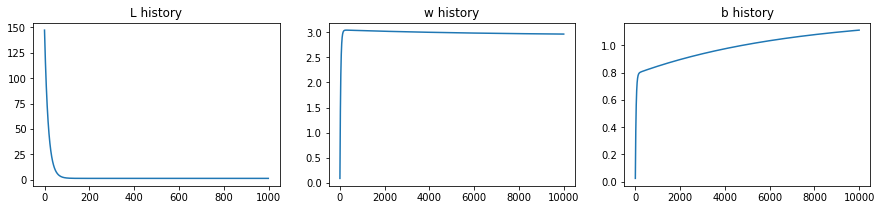

In [20]:
eta001_iterations:\
    Tuple[List[np.float32], List[np.float32], List[np.float32], Any]\
    = iterate_descent_gradient_stuff(0.001, x_train, y_train, loss_function)

print("RESULTS WITH AN ETA OF 0.0001")

print("\nITERATIONS TAKEN: {}".format(len(eta001_iterations[0])))

lowest_l_001: np.float32 = min(eta001_iterations[2])

lowest_l_index_001: int = eta001_iterations[2].index(lowest_l_001)

optimal_w_001: np.float32 = eta001_iterations[0][lowest_l_index_001]

optimal_b_001: np.float32 = eta001_iterations[1][lowest_l_index_001]

print("LOWEST L: {}".format(lowest_l_001))
print("OPTIMAL W: {}".format(optimal_w_001))
print("OPTIMAL B: {}".format(optimal_b_001))


print("\nw,b",optimal_w_001,optimal_b_001)
print("dL/dw",eta001_iterations[3][0].numpy()) # first element of grads list (w) will be printed
print("dL/db",eta001_iterations[3][1].numpy())

# Using Keras Models instead


## Using a Keras "model" to hold $w$ and $b$
Instead of building our own linear model $y=wx+b$ as above, we can use the in-built keras "Dense" layer

- We will use a keras "Dense" layer with 1 input and 1 output.
- This keras dense layer represents a model $y=wx+b$, where $w$ and $b$ are learnable variables.  
    - $w$ is called the "kernel", and $b$ is called the "bias"
    - Note that $w$ is a 1*1 matrix, and $b$ is a length-1 vector.

In [1]:
from tensorflow.keras import layers

class LinearModel(keras.Model):
    """
    Defining a Keras model in a complicated way.

    Same thing as the model function above, but this time it's in Keras instead.
    """
    def __init__(self):
        """
        We just want to add a single layer to the model.
        Specifically, we added a 'Dense' layer, with 1 output.
            Scalar input, Scalar output.
        """
        super(LinearModel, self).__init__()
        self.layer1: layers.Dense =layers.Dense(1)
    def call(self, x):
        """
        Calling this model just runs the layer in question
            In this instance, we run layer 1.
        """
        return self.layer1(x)
    
keras_linear_model: LinearModel =LinearModel()
print(keras_linear_model(x_train)) # 10 points in, 10 points out.
# has a w and b inside it.
#   Kernel (w) initialized randomly, bias (b) initialized to 0.
print("This is the w (kernel) value",keras_linear_model.layer1.kernel.numpy())
    # kernel: w
print("This is the b (bias) value",keras_linear_model.layer1.bias.numpy())
    # bias: b

# kernel and bias can be matrices instead of scalars.

NameError: name 'keras' is not defined

## Use Keras "fit" for the training loop
- Keras allows us to quickly define the optimizer to use (SGD), and the loss function to use
- It also provides a "fit" function which executes the training loop.

Run and study the following code.

In [22]:
from keras.callbacks import History

keras_linear_model.compile(
    optimizer=keras.optimizers.SGD(0.01),  # Optimizer
    loss=keras.losses.MeanSquaredError()
)
# ^ tells Keras to compile the model (works out derivatives it needs once, so it doesn't need to do that again)
#   telling it to use the SGD optimizer with a rate of 0.01
#   also telling to use mean squared error.


history: History = keras_linear_model.fit(
    x_train, # inputs
    y_train, # expected outputs
    batch_size=len(x_train),
    epochs=10000,
    verbose=0
)
# This is the 'fit' loop (the training loop)
# batch_size: how many inputs we're giving it.
# epochs: how many iterations to use
# verbose: 0 otherwise it'll print a lot of info.

# Does this a lot faster than doing it by hand.
    # still works out the derivatives at every step of the loop,
    # but doesn't need to work out how to differentiate them again.

In [23]:
print("w",keras_linear_model.layer1.kernel.numpy(),"Optimal w:",slope)
print("b",keras_linear_model.layer1.bias.numpy(),"Optimal b:",intercept)

# These our our results.

w [[2.9348383]] Optimal w: 2.9348235590433442
b [1.2110937] Optimal b: 1.2111488477281167


Final results from keras stuff:
```
w [[2.9348383]] Optimal w: 2.9348235590433442
b [1.2110937] Optimal b: 1.2111488477281167
```

## Summary

- We have built this simple model:
<img src="./images/ffnn_single_layer.svg" alt="1-layer FFNN" width="300">
- We've been introduced to Automatic Differentiation, and gradient descent.
- We've also seen the keras Dense layer, the Keras loss functions, optimizer and fit loop

- We'll study these more in the next workbook...